In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the CSV file into a DataFrame
df1 = pd.read_csv('data_1372.csv')
df1.drop('Unnamed: 0', axis=1, inplace=True)
df1

,A,B,C,D,E,F
0,1.235291,-1.134355,1.093103,-0.005897,-0.107156,0.186237
1,-0.024436,0.006688,2.043630,0.079189,0.114786,0.492908
2,6.275028,-0.860554,2.998722,1.724061,1.331363,2.749730
3,2.915105,0.495306,-0.022185,-0.386030,0.776131,1.625773
4,-1.490919,-1.391907,2.958764,-0.100572,-1.006085,3.835835
5,0.544409,0.411473,2.819194,-1.000794,0.814224,2.360125
6,0.098989,2.392594,2.735245,-0.622818,1.148119,1.552665
7,0.791651,0.809234,3.117479,0.018088,0.042586,0.643492
8,-1.719385,1.866135,3.832342,-0.207879,1.135067,3.115843
9,0.199790,1.691753,2.638764,-0.251614,0.203312,0.650563


          A         B         C         D         E         F
A  1.000000 -0.327166 -0.323905  0.690829  0.447305 -0.076234
B -0.327166  1.000000  0.268803 -0.467179  0.520850 -0.161197
C -0.323905  0.268803  1.000000  0.129931  0.107953  0.448316
D  0.690829 -0.467179  0.129931  1.000000  0.134405  0.116390
E  0.447305  0.520850  0.107953  0.134405  1.000000  0.102377
F -0.076234 -0.161197  0.448316  0.116390  0.102377  1.000000


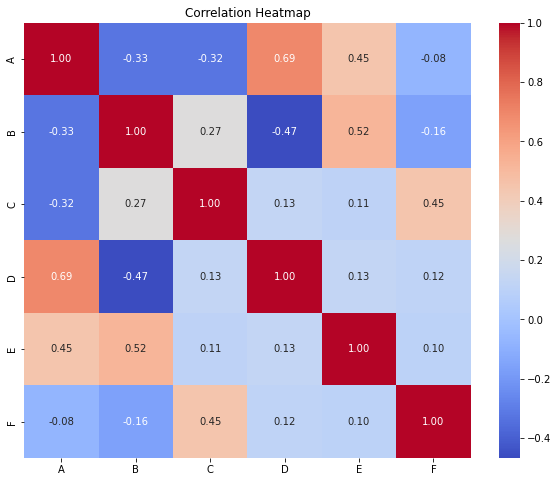

In [3]:
correlation_matrix1 = df1.corr()

print(correlation_matrix1)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

In [4]:
df2 = pd.read_csv('data_1394.csv')
df2.drop('Unnamed: 0', axis=1, inplace=True)
df2

,A,B,C,D,E,F
0,-0.433350,-2.041374,2.491330,1.093051,0.882626,3.484597
1,4.071383,-1.767905,3.719607,-0.006225,-0.111798,-0.416523
2,1.389708,-1.776859,2.193749,-0.318173,-0.698993,-0.376650
3,0.402491,1.503517,2.121959,-0.756075,-0.888215,1.387117
4,-1.634332,1.564276,2.890794,0.024334,-0.240630,2.054705
5,2.344993,-0.382027,1.377063,0.001807,-0.066641,-0.501381
6,-0.344654,4.098284,2.713674,-0.081554,-1.055711,2.286840
7,-0.389532,0.455122,-0.082094,0.028980,0.882793,0.829275
8,-0.722635,0.407176,2.968925,1.381289,-1.161706,3.908815
9,4.161282,0.328259,3.373359,-0.247891,0.841082,1.772833


          A         B         C         D         E         F
A  1.000000 -0.412637  0.322408 -0.363648  0.261948 -0.589319
B -0.412637  1.000000 -0.035155 -0.262259 -0.423742  0.308663
C  0.322408 -0.035155  1.000000  0.134930 -0.269844  0.253870
D -0.363648 -0.262259  0.134930  1.000000  0.071568  0.670134
E  0.261948 -0.423742 -0.269844  0.071568  1.000000 -0.061871
F -0.589319  0.308663  0.253870  0.670134 -0.061871  1.000000


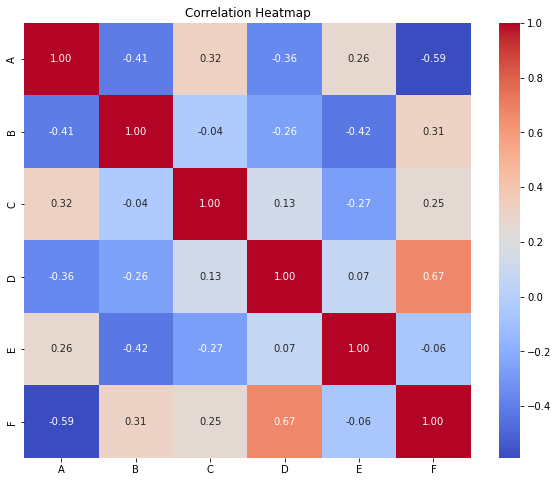

In [5]:
correlation_matrix2 = df2.corr()

print(correlation_matrix2)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

In [6]:
df3 = pd.read_csv('data_1372.csv')
df3.drop('Unnamed: 0', axis=1, inplace=True)
df3

,A,B,C,D,E,F
0,1.235291,-1.134355,1.093103,-0.005897,-0.107156,0.186237
1,-0.024436,0.006688,2.043630,0.079189,0.114786,0.492908
2,6.275028,-0.860554,2.998722,1.724061,1.331363,2.749730
3,2.915105,0.495306,-0.022185,-0.386030,0.776131,1.625773
4,-1.490919,-1.391907,2.958764,-0.100572,-1.006085,3.835835
5,0.544409,0.411473,2.819194,-1.000794,0.814224,2.360125
6,0.098989,2.392594,2.735245,-0.622818,1.148119,1.552665
7,0.791651,0.809234,3.117479,0.018088,0.042586,0.643492
8,-1.719385,1.866135,3.832342,-0.207879,1.135067,3.115843
9,0.199790,1.691753,2.638764,-0.251614,0.203312,0.650563


          A         B         C         D         E         F
A  1.000000 -0.327166 -0.323905  0.690829  0.447305 -0.076234
B -0.327166  1.000000  0.268803 -0.467179  0.520850 -0.161197
C -0.323905  0.268803  1.000000  0.129931  0.107953  0.448316
D  0.690829 -0.467179  0.129931  1.000000  0.134405  0.116390
E  0.447305  0.520850  0.107953  0.134405  1.000000  0.102377
F -0.076234 -0.161197  0.448316  0.116390  0.102377  1.000000


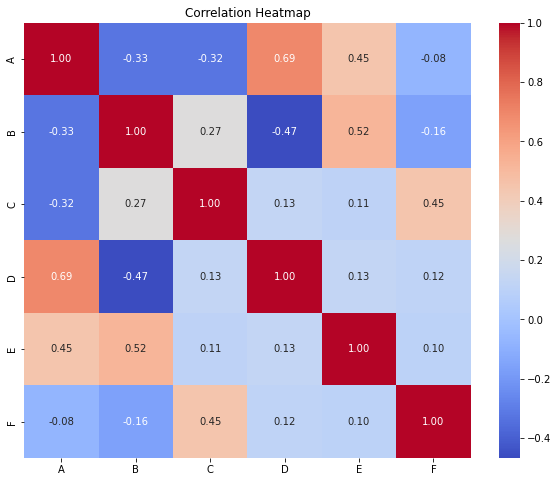

In [7]:
correlation_matrix3 = df3.corr()

print(correlation_matrix3)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix3, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

In [8]:
df4 = pd.read_csv('data_1400.csv')
df4.drop('Unnamed: 0', axis=1, inplace=True)
df4

,A,B,C,D,E,F
0,-3.130443,2.396879,0.870341,0.140634,-0.826904,4.005538
1,4.535687,-0.036950,1.374127,0.049399,-0.167118,1.042950
2,0.706033,-0.686432,1.994070,-0.067567,-0.063639,0.836092
3,0.651121,1.699051,2.674673,0.843057,-0.973428,1.081626
4,1.587271,0.255677,3.821490,-0.076947,-0.026412,1.080240
5,2.130904,1.092635,2.910873,-0.157400,1.045424,2.921297
6,0.070931,0.674804,-0.567133,-0.758706,0.806708,2.835852
7,1.629202,3.041310,3.924395,0.585269,0.723536,0.375938
8,0.619065,1.721586,2.624070,0.200001,0.250848,0.210735
9,-3.533632,2.045461,2.734416,0.003144,-1.530798,5.395115


          A         B         C         D         E         F
A  1.000000 -0.474230  0.185777  0.047562  0.588299 -0.731365
B -0.474230  1.000000  0.259037  0.510009 -0.167715  0.252884
C  0.185777  0.259037  1.000000  0.586434 -0.017444 -0.326100
D  0.047562  0.510009  0.586434  1.000000 -0.367234 -0.365852
E  0.588299 -0.167715 -0.017444 -0.367234  1.000000 -0.439119
F -0.731365  0.252884 -0.326100 -0.365852 -0.439119  1.000000


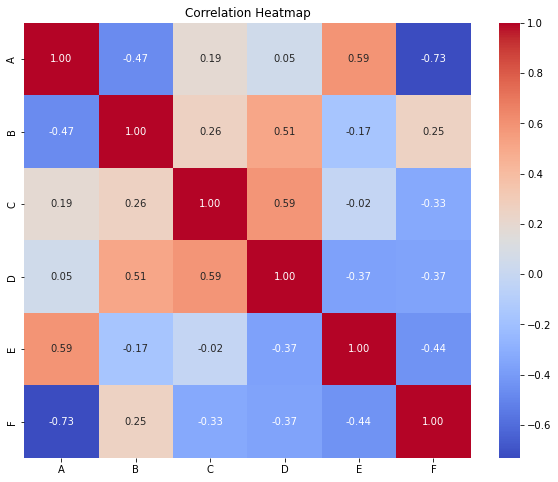

In [9]:
correlation_matrix4 = df4.corr()

print(correlation_matrix4)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix4, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

In [10]:
df = df1.append(df2)
df = df.append(df3)
df = df.append(df4)
df

C:\Users\nunni\AppData\Local\Temp\ipykernel_16040\1415967961.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2)
C:\Users\nunni\AppData\Local\Temp\ipykernel_16040\1415967961.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df3)
C:\Users\nunni\AppData\Local\Temp\ipykernel_16040\1415967961.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df4)


,A,B,C,D,E,F
0,1.235291,-1.134355,1.093103,-0.005897,-0.107156,0.186237
1,-0.024436,0.006688,2.043630,0.079189,0.114786,0.492908
2,6.275028,-0.860554,2.998722,1.724061,1.331363,2.749730
3,2.915105,0.495306,-0.022185,-0.386030,0.776131,1.625773
4,-1.490919,-1.391907,2.958764,-0.100572,-1.006085,3.835835
5,0.544409,0.411473,2.819194,-1.000794,0.814224,2.360125
6,0.098989,2.392594,2.735245,-0.622818,1.148119,1.552665
7,0.791651,0.809234,3.117479,0.018088,0.042586,0.643492
8,-1.719385,1.866135,3.832342,-0.207879,1.135067,3.115843
9,0.199790,1.691753,2.638764,-0.251614,0.203312,0.650563


          A         B         C         D         E         F
A  1.000000 -0.377818 -0.027746  0.312134  0.423919 -0.406022
B -0.377818  1.000000  0.142932 -0.232106  0.007282  0.134594
C -0.027746  0.142932  1.000000  0.207166 -0.003955  0.125369
D  0.312134 -0.232106  0.207166  1.000000 -0.029954  0.158385
E  0.423919  0.007282 -0.003955 -0.029954  1.000000 -0.100594
F -0.406022  0.134594  0.125369  0.158385 -0.100594  1.000000


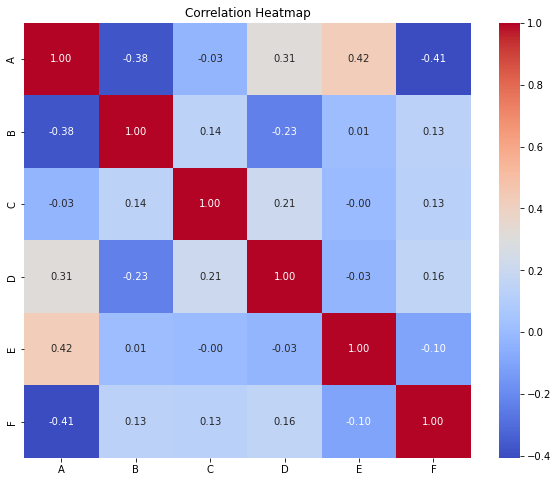

In [11]:
correlation_matrix = df.corr()

print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

Mutual Information between A and B: 1.5084195094814772
Mutual Information between xn and yn1: 1.5880368808327692


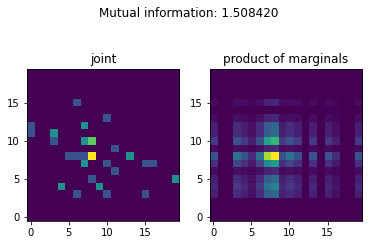

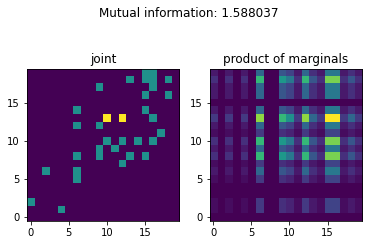

In [12]:
def MI(x, y, Nbins=21):
    bins = np.linspace(np.min(x), np.max(x), Nbins)
    eps = np.spacing(1)
    x_marginal = np.histogram(x, bins=bins)[0]
    x_marginal = x_marginal / x_marginal.sum()
    y_marginal = np.histogram(y, bins=bins)[0]
    y_marginal = y_marginal / y_marginal.sum()
    xy_joint = np.histogram2d(x, y, bins=(bins, bins))[0]
    xy_joint = xy_joint / xy_joint.sum()

    plt.figure()
    plt.subplot(1, 2, 1)
    plt.imshow(xy_joint.T, origin='lower')
    plt.title('joint')
    plt.subplot(1, 2, 2)
    plt.imshow((x_marginal[:, None] * y_marginal[None, :]).T, origin='lower')
    plt.title('product of marginals')
    MI_value = np.sum(xy_joint * np.log(xy_joint / (x_marginal[:, None] * y_marginal[None, :] + eps) + eps))
    plt.suptitle('Mutual information: %f' % MI_value)
    return MI_value

# Assuming df is your DataFrame with columns A, B, C, D, E, F
x = df['A']
y = df['B']
MI_value = MI(x, y)
print("Mutual Information between A and B:", MI_value)

# Example with random data
xn = np.random.randn(len(x))
yn = np.random.randn(len(x))
yn1 = xn + yn
MI_value_random = MI(xn, yn1)
print("Mutual Information between xn and yn1:", MI_value_random)

A virker central - har høj correlation med alle undtagen C

In [13]:
df['A'].mean()

0.7940635614372507

Intervention: A = 1

In [24]:
df_A = pd.read_csv('data_1403.csv')
df_A

,Unnamed: 0,A,B,C,D,E,F
0,0,1.0,0.924515,3.096279,-0.013630,-0.284283,-0.498608
1,1,1.0,-1.182831,0.228595,-0.112492,-0.268401,1.691730
2,2,1.0,0.828006,2.395470,-0.089796,0.055045,1.493439
3,3,1.0,-1.238862,2.815715,0.100369,-1.045953,1.650546
4,4,1.0,-0.689955,-0.466644,-0.334354,0.108129,-0.532227
...,...,...,...,...,...,...,...
95,95,1.0,0.064775,0.172358,-0.273408,1.194161,3.988488
96,96,1.0,0.054202,3.256345,0.144685,0.096891,2.633942
97,97,1.0,0.337112,1.549853,0.731514,-0.940053,0.995035
98,98,1.0,1.165079,2.848095,0.597675,-1.014915,3.071295


            Unnamed: 0   A         B         C         D         E         F
Unnamed: 0    1.000000 NaN  0.124948  0.204581  0.188182  0.054609  0.121241
A                  NaN NaN       NaN       NaN       NaN       NaN       NaN
B             0.124948 NaN  1.000000  0.604929 -0.012526  0.148509  0.181402
C             0.204581 NaN  0.604929  1.000000  0.012756 -0.026646  0.151884
D             0.188182 NaN -0.012526  0.012756  1.000000  0.152067 -0.025928
E             0.054609 NaN  0.148509 -0.026646  0.152067  1.000000  0.000813
F             0.121241 NaN  0.181402  0.151884 -0.025928  0.000813  1.000000


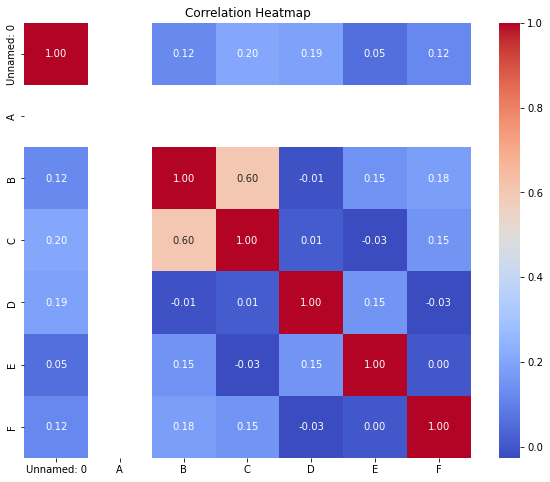

In [25]:
correlation_matrix_A = df_A.corr()

print(correlation_matrix_A)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_A, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

Når A = 1, er B og C meget correlerede, resten er meget lidt correlerede generelt

In [26]:
df['D'].mean()

0.009297378194973

D = 1

In [29]:
df_D = pd.read_csv('data_1406.csv')
df_D

,Unnamed: 0,A,B,C,D,E,F
0,0,3.000220,-1.002863,0.980499,1.0,-0.086888,1.099187
1,1,-1.214600,0.259471,-0.044627,1.0,-1.072792,3.226051
2,2,1.156434,1.235495,2.976434,1.0,1.016944,1.479551
3,3,-0.397970,0.287625,3.010966,1.0,-0.873716,3.243828
4,4,0.997328,1.730349,2.804522,1.0,0.728179,1.199116
...,...,...,...,...,...,...,...
95,95,-0.197707,-0.873439,0.424493,1.0,-0.792309,2.241367
96,96,1.766603,0.521433,3.271958,1.0,-0.883498,0.888516
97,97,1.610117,0.849680,1.556128,1.0,-1.156450,4.202392
98,98,-0.493929,1.973701,3.008865,1.0,-0.920425,2.972955


In [36]:
df_D.mean()

Unnamed: 0    49.500000
A              1.500266
B             -0.315402
C              1.361676
D              1.000000
E             -0.067310
F              2.212717
dtype: float64

            Unnamed: 0         A         B         C   D         E         F
Unnamed: 0    1.000000  0.069415  0.001767 -0.057253 NaN  0.001799 -0.034455
A             0.069415  1.000000 -0.487589 -0.105954 NaN  0.041144 -0.661721
B             0.001767 -0.487589  1.000000  0.446834 NaN -0.040187  0.336405
C            -0.057253 -0.105954  0.446834  1.000000 NaN  0.147843 -0.010001
D                  NaN       NaN       NaN       NaN NaN       NaN       NaN
E             0.001799  0.041144 -0.040187  0.147843 NaN  1.000000  0.015219
F            -0.034455 -0.661721  0.336405 -0.010001 NaN  0.015219  1.000000


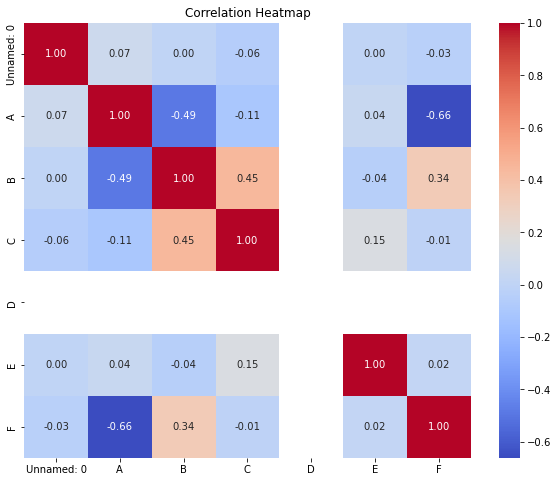

In [30]:
correlation_matrix_D = df_D.corr()

print(correlation_matrix_D)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_D, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

Når D = 1, så er A og B correlerede, B og C er correlede, A og F er correlede og B og F er correlerede 

In [31]:
df['F'].mean()

1.7160339192513905

F = 1

In [32]:
df_F = pd.read_csv('data_1407.csv')
df_F

,Unnamed: 0,A,B,C,D,E,F
0,0,1.526784,1.492519,2.908506,0.740211,-0.866081,1.0
1,1,4.243893,-2.951891,2.731560,-2.157533,1.247871,1.0
2,2,-0.565053,-1.168048,-1.124283,-0.067510,-0.205328,1.0
3,3,0.785427,0.133641,1.829099,0.045711,-0.047005,1.0
4,4,1.716037,1.686283,3.973878,-1.249818,-1.185936,1.0
...,...,...,...,...,...,...,...
95,95,0.332460,3.232869,2.865018,0.663342,-1.230905,1.0
96,96,2.022705,0.072261,3.251146,1.437591,-1.254455,1.0
97,97,1.648724,0.968588,3.872706,-0.141454,-0.281431,1.0
98,98,3.697876,-1.793007,3.076396,-0.064533,-0.943593,1.0


            Unnamed: 0         A         B         C         D         E   F
Unnamed: 0    1.000000  0.127986  0.133035  0.094950 -0.002523 -0.050811 NaN
A             0.127986  1.000000 -0.205675  0.044607 -0.061232  0.006046 NaN
B             0.133035 -0.205675  1.000000  0.423695 -0.034633 -0.049596 NaN
C             0.094950  0.044607  0.423695  1.000000 -0.030219  0.039964 NaN
D            -0.002523 -0.061232 -0.034633 -0.030219  1.000000 -0.014845 NaN
E            -0.050811  0.006046 -0.049596  0.039964 -0.014845  1.000000 NaN
F                  NaN       NaN       NaN       NaN       NaN       NaN NaN


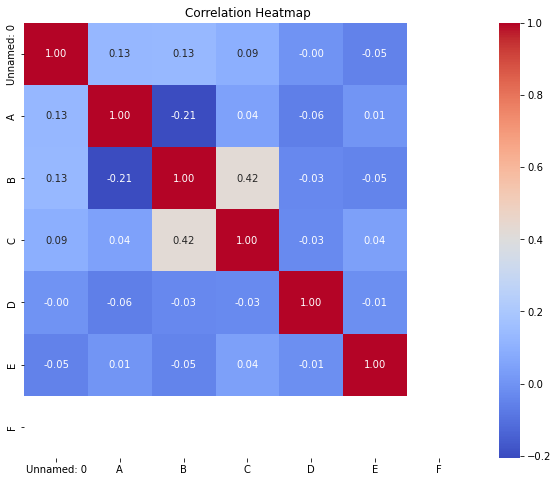

In [33]:
correlation_matrix_F = df_F.corr()

print(correlation_matrix_F)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_F, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

B = 1

In [34]:
df_B = pd.read_csv('data_1412.csv')
df_B

,Unnamed: 0,A,B,C,D,E,F
0,0,-1.587196,1.0,2.656747,-0.326987,1.257080,4.315013
1,1,1.644088,1.0,-0.352483,0.864324,0.848989,1.506807
2,2,0.625930,1.0,0.782362,-1.041457,-0.917211,2.946557
3,3,-0.995705,1.0,0.413379,0.043643,1.008178,1.327968
4,4,5.202908,1.0,2.898339,-0.445085,-1.067858,2.808265
...,...,...,...,...,...,...,...
95,95,-0.564343,1.0,2.352456,-0.148682,0.407717,1.516897
96,96,-1.262197,1.0,3.362483,-1.313103,0.945159,4.791276
97,97,-1.197879,1.0,3.517099,-0.009833,-0.134895,1.795481
98,98,3.463757,1.0,1.671403,1.531035,-1.041429,1.199368


            Unnamed: 0         A   B         C         D         E         F
Unnamed: 0    1.000000 -0.127735 NaN -0.156109  0.027498 -0.225579  0.044759
A            -0.127735  1.000000 NaN  0.038615  0.186856  0.133564 -0.320108
B                  NaN       NaN NaN       NaN       NaN       NaN       NaN
C            -0.156109  0.038615 NaN  1.000000  0.114917 -0.040151  0.176275
D             0.027498  0.186856 NaN  0.114917  1.000000  0.073224 -0.034602
E            -0.225579  0.133564 NaN -0.040151  0.073224  1.000000  0.063612
F             0.044759 -0.320108 NaN  0.176275 -0.034602  0.063612  1.000000


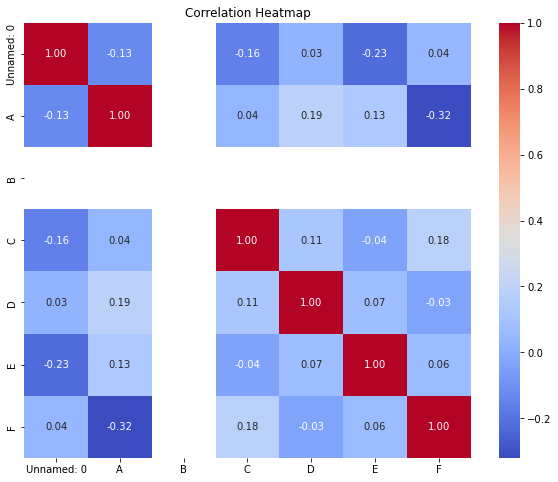

In [35]:
correlation_matrix_B = df_B.corr()

print(correlation_matrix_B)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_B, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()